# This Dataset Contains Important Datas about Chronic Kidney Disease
In this notebook, we will analyze important datas about this disease, make the data suitable for training and train the model, then we will make predictions with this models.

Our road map;

Data Analysis

Solve Missing Value Problem

Data Pre-Processing

Train a Decision Tree Classifier Model

Decision Tree Visualization - Feature importance


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.drop("id",axis=1,inplace = True) 

In [4]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.columns # View column names

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Rename column names

In [6]:
df.columns = ["age","blood_pressure","spesific_gravity","albumin","sugar","red_blood_cells","puss_cell","puss_cell_clumbs","bacteria","blood_glucose_random","blood_urea","serum_creatinine","sodium","potassium","hemoglobin","packed_cell_volume","white_blood_cell_count","red_blood_cell_count","hpyertension","diabetes_mellitus","coronart_artery_disease","appetite","peda_edema","aanemia","class"]

In [7]:
df.info() # View General Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   spesific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   puss_cell                335 non-null    object 
 7   puss_cell_clumbs         396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [8]:
df.describe()

,age,blood_pressure,spesific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Transform object columns to numerical columns

In [9]:
df["packed_cell_volume"] = pd.to_numeric(df["packed_cell_volume"],errors="coerce")
df["white_blood_cell_count"] = pd.to_numeric(df["white_blood_cell_count"],errors="coerce")
df["red_blood_cell_count"] = pd.to_numeric(df["red_blood_cell_count"],errors="coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   spesific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   puss_cell                335 non-null    object 
 7   puss_cell_clumbs         396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

Determine categorical columns and numeric columns

In [11]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"] 
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   spesific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   puss_cell                335 non-null    object 
 7   puss_cell_clumbs         396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [13]:
for col in cat_cols: # View column features
    print(f"{col}: {df[col].unique()}")

red_blood_cells: [nan 'normal' 'abnormal']
puss_cell: ['normal' 'abnormal' nan]
puss_cell_clumbs: ['notpresent' 'present' nan]
bacteria: ['notpresent' 'present' nan]
hpyertension: ['yes' 'no' nan]
diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronart_artery_disease: ['no' 'yes' '\tno' nan]
appetite: ['good' 'poor' nan]
peda_edema: ['no' 'yes' nan]
aanemia: ['no' 'yes' nan]
class: ['ckd' 'ckd\t' 'notckd']


Data Cleaning

In [14]:
df["diabetes_mellitus"].replace(to_replace={'\tno':"no", '\tyes':"yes", ' yes':"yes"},inplace=True)
df["coronart_artery_disease"].replace(to_replace={'\tno':"no"},inplace=True)
df["class"].replace(to_replace={'ckd\t':"ckd"},inplace=True)

Transforming Categorical Features to Numerical Features

In [15]:
df["class"] = df["class"].map({"ckd":0, "notckd":1})

In [16]:
df["class"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [17]:
df.columns

Index(['age', 'blood_pressure', 'spesific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'puss_cell', 'puss_cell_clumbs', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hpyertension',
       'diabetes_mellitus', 'coronart_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

Solve Missing Value Problem

In [18]:
df.isna().sum().sort_values(ascending=False) # View Missing Value Counts

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
puss_cell                   65
hemoglobin                  52
sugar                       49
spesific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
puss_cell_clumbs             4
hpyertension                 2
diabetes_mellitus            2
coronart_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [19]:
def solve_mv_random_value(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

for col in num_cols:
    solve_mv_random_value(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
spesific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [20]:
df.columns

Index(['age', 'blood_pressure', 'spesific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'puss_cell', 'puss_cell_clumbs', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hpyertension',
       'diabetes_mellitus', 'coronart_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [21]:
def solve_mv_mode(feature):
    mode = df[feature].mode()[0]  # Calculate mod value
    df[feature].fillna(mode, inplace=True)  # Fillna

solve_mv_random_value("red_blood_cells") # fill with random values 
solve_mv_random_value("puss_cell") # fill with random values

for col in cat_cols:
    solve_mv_mode(col)

In [22]:
df[cat_cols].isnull().sum()

red_blood_cells            0
puss_cell                  0
puss_cell_clumbs           0
bacteria                   0
hpyertension               0
diabetes_mellitus          0
coronart_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

Feature Encoding

In [23]:
for col in cat_cols: # Calculating unique values
    print(f"{col}: {df[col].nunique()}")

red_blood_cells: 2
puss_cell: 2
puss_cell_clumbs: 2
bacteria: 2
hpyertension: 2
diabetes_mellitus: 2
coronart_artery_disease: 2
appetite: 2
peda_edema: 2
aanemia: 2
class: 2


Transforming with Label Encoder

In [24]:
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

Split values for train and test

In [25]:
independent_col = [col for col in df.columns if col != "class"] # Determining independent features
dependent_col = "class" # Determining dependent feature

In [26]:
X = df[independent_col] 
y = df[dependent_col]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=45)

Train model with Decision Tree Classifier

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

# View Accuracy Score
y_pred = dtc.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In [29]:
# View Classification Report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.94      0.96        48\n           1       0.91      0.97      0.94        32\n\n    accuracy                           0.95        80\n   macro avg       0.95      0.95      0.95        80\nweighted avg       0.95      0.95      0.95        80\n'

View Confusion Matrix

In [30]:
print("confusion_matrix: ",confusion_matrix(y_test,y_pred))

confusion_matrix:  [[45  3]
 [ 1 31]]


Data Visualization

In [31]:
class_names=["ckd","notckd"] 

View Decision Tree

[Text(0.39705882352941174, 0.9, 'hemoglobin <= 13.25\ngini = 0.466\nsamples = 320\nvalue = [202, 118]'),
 Text(0.11764705882352941, 0.7, 'hemoglobin <= 12.95\ngini = 0.053\nsamples = 185\nvalue = [180, 5]'),
 Text(0.25735294117647056, 0.8, 'True  '),
 Text(0.058823529411764705, 0.5, 'gini = 0.0\nsamples = 172\nvalue = [172, 0]'),
 Text(0.17647058823529413, 0.5, 'serum_creatinine <= 1.25\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(0.11764705882352941, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.23529411764705882, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6764705882352942, 0.7, 'spesific_gravity <= 1.017\ngini = 0.273\nsamples = 135\nvalue = [22, 113]'),
 Text(0.5367647058823529, 0.8, '  False'),
 Text(0.47058823529411764, 0.5, 'packed_cell_volume <= 49.0\ngini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.35294117647058826, 0.3, 'hemoglobin <= 15.6\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.29411764705882354, 0.1, 'gini = 0.0\nsample

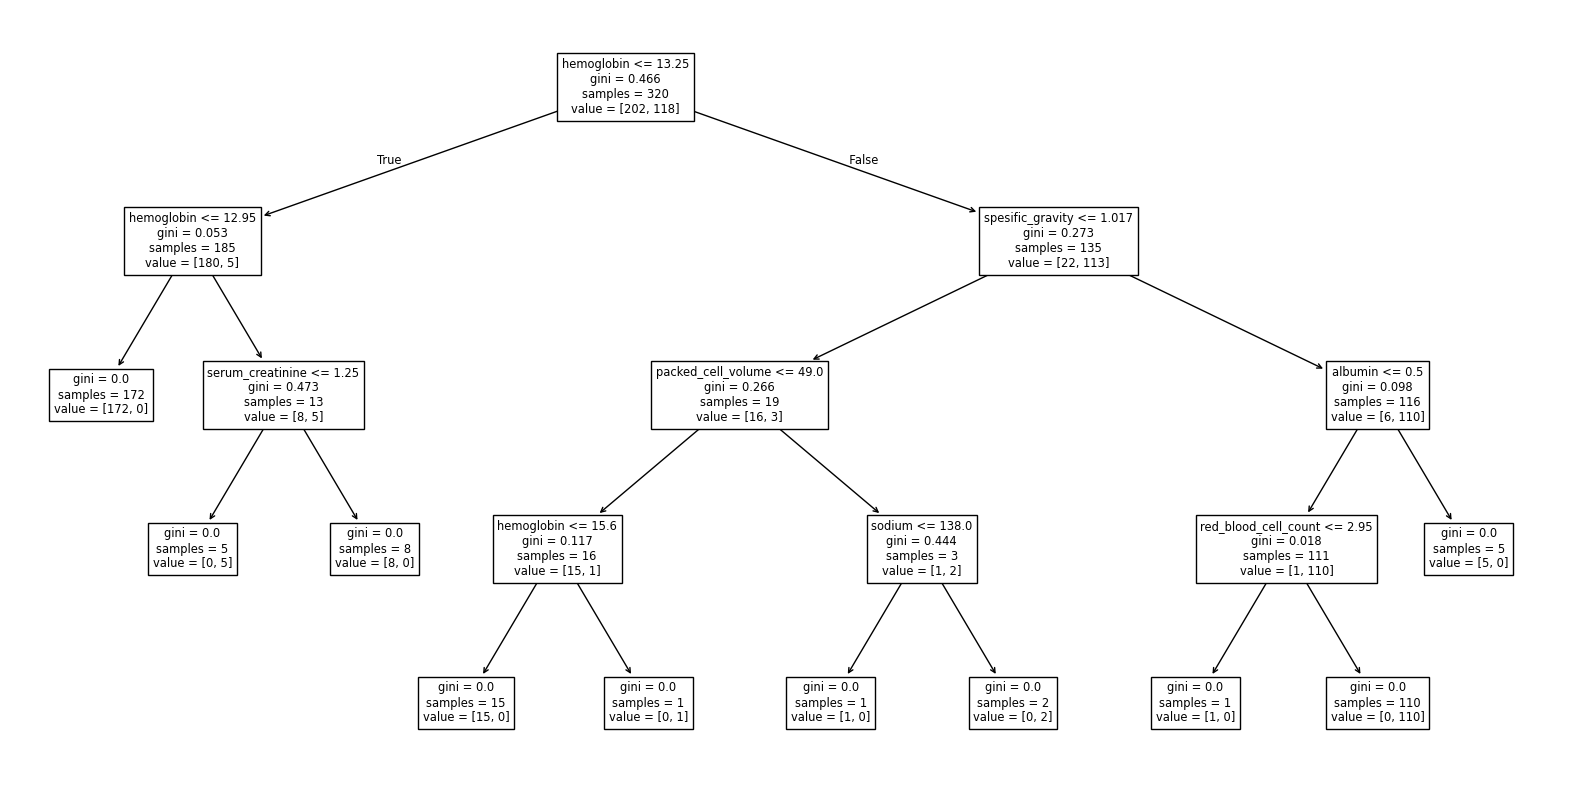

In [32]:
plt.figure(figsize=(20,10))
plot_tree(dtc,feature_names=independent_col)

Determine most important features

In [33]:
feature_importance = pd.DataFrame({"Feature":independent_col,"Importance":dtc.feature_importances_})

In [34]:
feature_importance

,Feature,Importance
0,age,0.000000
1,blood_pressure,0.000000
2,spesific_gravity,0.136920
3,albumin,0.063080
4,sugar,0.000000
5,red_blood_cells,0.000000
6,puss_cell,0.000000
7,puss_cell_clumbs,0.000000
8,bacteria,0.000000
9,blood_glucose_random,0.000000


In [35]:
print("Most important feature: ",feature_importance.sort_values(by="Importance",ascending=False).iloc[0])

Most important feature:  Feature       hemoglobin
Importance      0.724058
Name: 14, dtype: object


Visualize most important feature

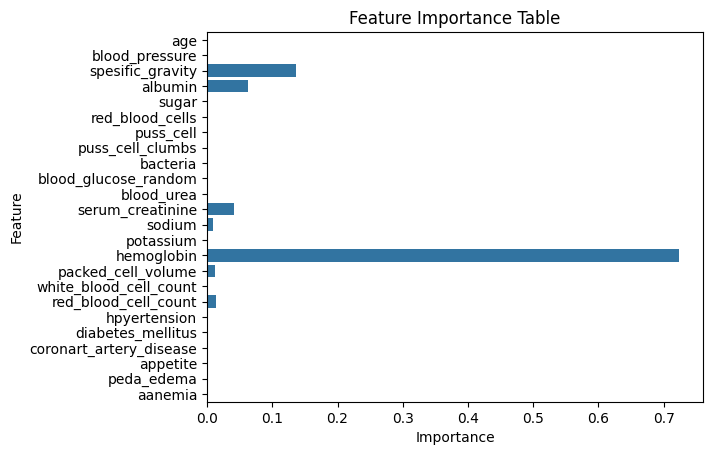

In [36]:
plt.figure()
sns.barplot(x = "Importance", y = "Feature", data = feature_importance)
plt.title("Feature Importance Table")
plt.show()